# nltk를 활용한 토큰화

nltk 라이브러리를 설치해야 합니다.

- `!pip install nltk`

In [1]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer() # 자음/모음 분리
porter.stem("going")

'go'

In [3]:
# 텍스트를 넣으면 토큰 리스트가 반환되도록 함수화합니다.

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()] # 띄어쓰기 기준으로 나누고 분리하기

tokenizer_porter("I'm going home")

["i'm", 'go', 'home']

In [4]:
# 불용어 사전 다운 받기
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [6]:
text = "a runner likes running and runs a lot"
[w for w in tokenizer_porter(text) if w not in stopwords]

['runner', 'like', 'run', 'run', 'lot']

# 한국어 토크나이저

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

data = pd.read_json("./data/naver_movie_summary.json") # 네이버 영화 줄거리 데이터(비슷한 단어가 얼마나 나왔나??)

In [29]:
content = data.loc[:10000, 'content']

우선 단순하게 띄어쓰기 기반으로 토큰화 해보겠습니다.
1. 토크나이징
2. 문서-단어 행렬
3. 코사인, 유사도 구하기
4. 유사도 순으로 정렬

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = SubstringTokenizer)
X = vectorizer.fit_transform(content) # 희소행렬 반환, 68만개의 단어 => 4만개의 단어로 줄임

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(X)
sims.shape

(10001, 10001)

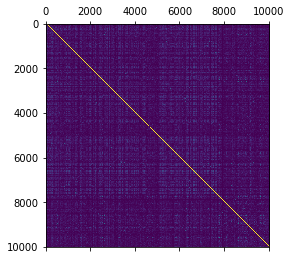

In [37]:
import matplotlib.pyplot as plt
plt.matshow(sims) # 밝은 곳이 단어가 많은 부분

In [39]:
(data['title'] == '혹성탈출').argmax() # argmax() max값이 몇번째에 있는지

867

In [41]:
sims[867] # '혹성탈출'과 다른 영화들 간의 유사도

array([0.05904099, 0.04908656, 0.0715834 , ..., 0.0446308 , 0.03162154,
       0.02762456])

In [43]:
sorted(sims[867], reverse=True)

[0.9999999999999996,
 0.27080348648164343,
 0.26296449721851356,
 0.2591532159468417,
 0.2326561408142902,
 0.23063863704541293,
 0.2296003917010619,
 0.22739829885051793,
 0.22030493682898938,
 0.21796783579763404,
 0.2165038488358357,
 0.21182842549117847,
 0.2100962800156752,
 0.2080764496275193,
 0.20680899644440212,
 0.20409948419490487,
 0.20183122875253384,
 0.20113440765942084,
 0.20039177314724788,
 0.19758895296931953,
 0.1960392117639214,
 0.18461392810098745,
 0.18344879771901973,
 0.18280093920644483,
 0.18207283700992688,
 0.1807037731223568,
 0.17781894433564757,
 0.17603964598462793,
 0.17558457232829133,
 0.1748507515380764,
 0.17327582002091804,
 0.1721780947762389,
 0.16977383338078356,
 0.16950485175344526,
 0.16872368941451038,
 0.1683775891743376,
 0.16833165104701336,
 0.16794794420469455,
 0.16703554574560964,
 0.16701418544667831,
 0.16663832922419944,
 0.1665150544407164,
 0.16605279103876786,
 0.16531477863415114,
 0.16458207636855898,
 0.16422555616084059,
 

In [45]:
np.argsort(-sims[867])

array([ 867, 6792, 2392, ..., 8471, 6131, 1693], dtype=int64)

In [46]:
data.loc[6792]

title                                     스타 트렉 - 보이저 TV 시리즈
content    Episode 1 " 케어테이커 1부". 실종된 한 장교를 찾는 동안, 함장 캐슬린...
Name: 6792, dtype: object

In [47]:
for i in np.argsort(-sims[867])[:10]:
    print(data.loc[i])

title                                                   혹성탈출
content    지구시각 2673년 3월 26일, 삭막해진 세상에 모든 미련을 버린 테일러 일행을 ...
Name: 867, dtype: object
title                                     스타 트렉 - 보이저 TV 시리즈
content    Episode 1 " 케어테이커 1부". 실종된 한 장교를 찾는 동안, 함장 캐슬린...
Name: 6792, dtype: object
title                                    혹성 탈출 2 - 지하 도시의 음모
content    {사악한 인간을 조심하라. 인간은 악의 볼모다. 탐욕에 눈이 멀어 유희로 신의 창조...
Name: 2392, dtype: object
title                                               보이저호의 음모
content    지구를 둘러싼 방사능띠의 심각한 위협 때문에 다른 행성에서 살 곳을 찾아야만 했다....
Name: 1129, dtype: object
title                               스타 트렉 - 넥스트 제너레이션 TV 시리즈
content    1편, 미지 세계로의 출항(Encounter At Farpoint). U.S.S. ...
Name: 6789, dtype: object
title                                              LA 대지진 특급
content    클레어리 윈글로우 박사(Dr. Clare Winslow: 조안나 컨스 분)와 그녀의...
Name: 5360, dtype: object
title                                             로스트 인 스페이스
content    서기 2058년, 최첨단 과학 문명이 세워놓은 미래 사회에 절대 절명의 위

In [22]:
vectorizer.vocabulary_

{'유명': 459673,
 '영화감독으로': 429058,
 '활약': 673232,
 '중인': 540285,
 '토토': 611134,
 '자크': 496062,
 '페렝': 625230,
 '고향': 81197,
 '마을의': 207378,
 '영사기사': 427306,
 '알프레도': 397815,
 '필립': 641183,
 '느와레': 143833,
 '사망소식에': 306931,
 '30년': 7830,
 '만에': 211741,
 '고향을': 81267,
 '찾는다': 559669,
 '어린': 408052,
 '시절': 369350,
 '영화가': 429040,
 '세상의': 337759,
 '전부였던': 510714,
 '소년': 341052,
 '살바토레': 314676,
 '카스치오': 585205,
 '학교': 645704,
 '수업을': 351853,
 '마치면': 208831,
 '마을': 207282,
 '광장에': 90212,
 '있는': 490387,
 '낡은': 128271,
 '시네마천국': 366390,
 '이라는': 471619,
 '극장으로': 106052,
 '달려가': 151242,
 '영사': 427291,
 '기사': 111204,
 '알프레도와': 397822,
 '친구로': 581477,
 '지내며': 543347,
 '어깨너머로': 407112,
 '영사기술을': 427313,
 '배운다': 262892,
 '어느': 407171,
 '관객들을': 87721,
 '위해': 456993,
 '광장에서': 90214,
 '야외': 403813,
 '상영을': 319628,
 '해주던': 654686,
 '알프레도가': 397816,
 '그만': 104964,
 '화재': 671017,
 '사고로': 303893,
 '실명하게': 375807,
 '되고': 174873,
 '토토가': 611135,
 '그의': 105336,
 '뒤를': 177965,
 '이어': 475866,
 '영상기사로': 427400,


In [25]:
def SubstringTokenizer(text):
    return [t[:2] for t in text.split() if len(t)>1]
SubstringTokenizer("황량한 사막")

['황량', '사막']

In [8]:
vectorizer = CountVectorizer() # 디폴트: 소문자화, 띄어쓰기 기준으로 토큰화
vectors = vectorizer.fit_transform(data['content'])

In [9]:
qeury = "혹성탈출"
query_idx = (data['title'] == qeury).argmax()

dists = cosine_distances(vectors[query_idx], vectors)[0]
movies_idx = dists.argsort()

for idx in movies_idx[:10]:
    print(data.iloc[idx])
    print("distance:", dists[idx], '\n')

title                                                   혹성탈출
content    지구시각 2673년 3월 26일, 삭막해진 세상에 모든 미련을 버린 테일러 일행을 ...
Name: 867, dtype: object
distance: 0.0 

title                                                  가스 도시
content    황량한 사막 위에 서 있는 세 명의 병사. 그들은 꽃을 찾기 위해 길을 나섰다. 그...
Name: 25022, dtype: object
distance: 0.8157607748506661 

title                                     스타 트렉 - 보이저 TV 시리즈
content    Episode 1 " 케어테이커 1부". 실종된 한 장교를 찾는 동안, 함장 캐슬린...
Name: 6792, dtype: object
distance: 0.8216246613212431 

title                                               네버엔딩 스토리
content    어머니가 돌아가신 바스티안(Bastian: 바렛 올리버 분)은 상상력이 풍부하고 몽...
Name: 83, dtype: object
distance: 0.8264378531087603 

title                                        당신을 초대합니다
content    물고기를 키우며 살고 있는 남자, 그런데 어느 날 키우던 물고기가 죽게 된다.
Name: 43928, dtype: object
distance: 0.8285801742578066 

title                                                뱀파이어 헌터
content    17세기 청조시대의 중국 어느 지방, 죽은 시체가 다시 살아나 강시가 되어 인간의 ...
Name: 22069

In [12]:
import numpy as np
syllables = np.array([chr(code) for code in range(44032, 55204)])
syllables = syllables.reshape(19, 21, 28)
print(syllables.shape)

(19, 21, 28)


# 토크나이저 개선

띄어쓰기로 나눈 뒤, 한 글자 단어는 없애고, 앞 두 음절만 이용하는 토크나이저를 만들어보겠습니다.

띄어쓰기가 잘 되어있는 한국어 문서에서 빠르게 사용해볼 수 있는 방법입니다.



In [15]:
def substring_tokenizer(text):
    tokens = text.split()
    return [token[:2] for token in tokens if len(token) > 1]

substring_tokenizer("조용한 한 카페에서 두 연인이 대화를 나누고 있다.")

['조용', '카페', '연인', '대화', '나누', '있다']

좀 더 관련성 있는 영화들이 골라진 걸 볼 수 있습니다.

In [16]:
vectorizer = CountVectorizer(tokenizer=substring_tokenizer)
vectors = vectorizer.fit_transform(data['content'])

qeury = "혹성탈출"
query_idx = (data['title'] == qeury).argmax()

dists = cosine_distances(vectors[query_idx], vectors)[0]
movies_idx = dists.argsort()

for idx in movies_idx[:10]:
    print(data.iloc[idx])
    print("distance:", dists[idx], '\n') 

title                                                   혹성탈출
content    지구시각 2673년 3월 26일, 삭막해진 세상에 모든 미련을 버린 테일러 일행을 ...
Name: 867, dtype: object
distance: 4.440892098500626e-16 

title                                                  스타퀘스트
content    환경오염으로 죽어가는 지구를 떠나 인류를 위한 새로운 개척지를 구하기 위해 국제연합...
Name: 16454, dtype: object
distance: 0.6477696713391371 

title                                                     블랙
content    은 지구에서의 갑작스런 핵전쟁으로 인해 우주정거장에 갇힌 두 명의 우주비행사들의 이...
Name: 72356, dtype: object
distance: 0.6676057559104907 

title                                            에이지 오브 투모로우
content    지구와 충돌 궤도에 있는 행성을 폭파시키기 위해 최정예 조종사들과 물리학 박사가 우...
Name: 59245, dtype: object
distance: 0.6716052112854073 

title                                        우주전쟁 : 지구 최후의 날
content    생존 가능한 행성을 찾아 온 인류가 우주선 생활을 한지 40년 만에 웜홀을 통해 마...
Name: 61440, dtype: object
distance: 0.6994123402791281 

title                                                  혹성 탈출
content    서기 2029년 지구에서 쏘아 올려진 우주 정거장

In [13]:
text = "황량한 사막 위의 병사"

In [15]:
text.split()

def SubstringTokenizer(text):
    return [t[:2] for t in text.split()] # 리스트 내포(각 원소를 내보내줌)

SubstringTokenizer(text)

['황량', '사막', '위의', '병사']